**K_![Cross_validation.png](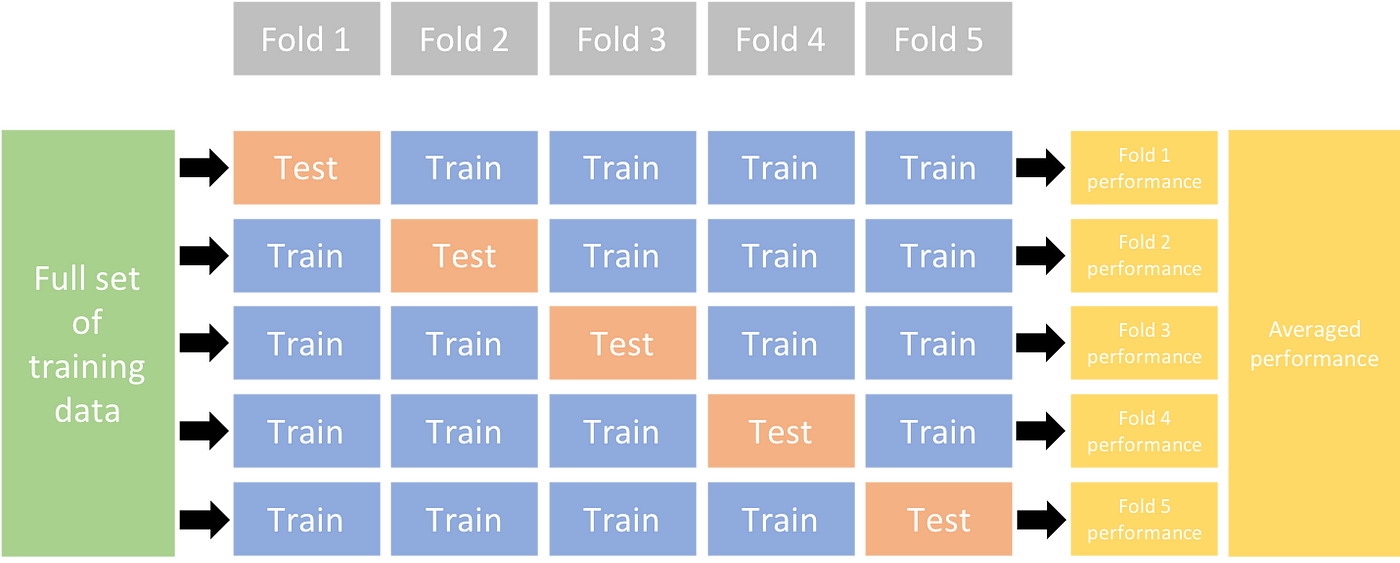![Cross_validation.webp](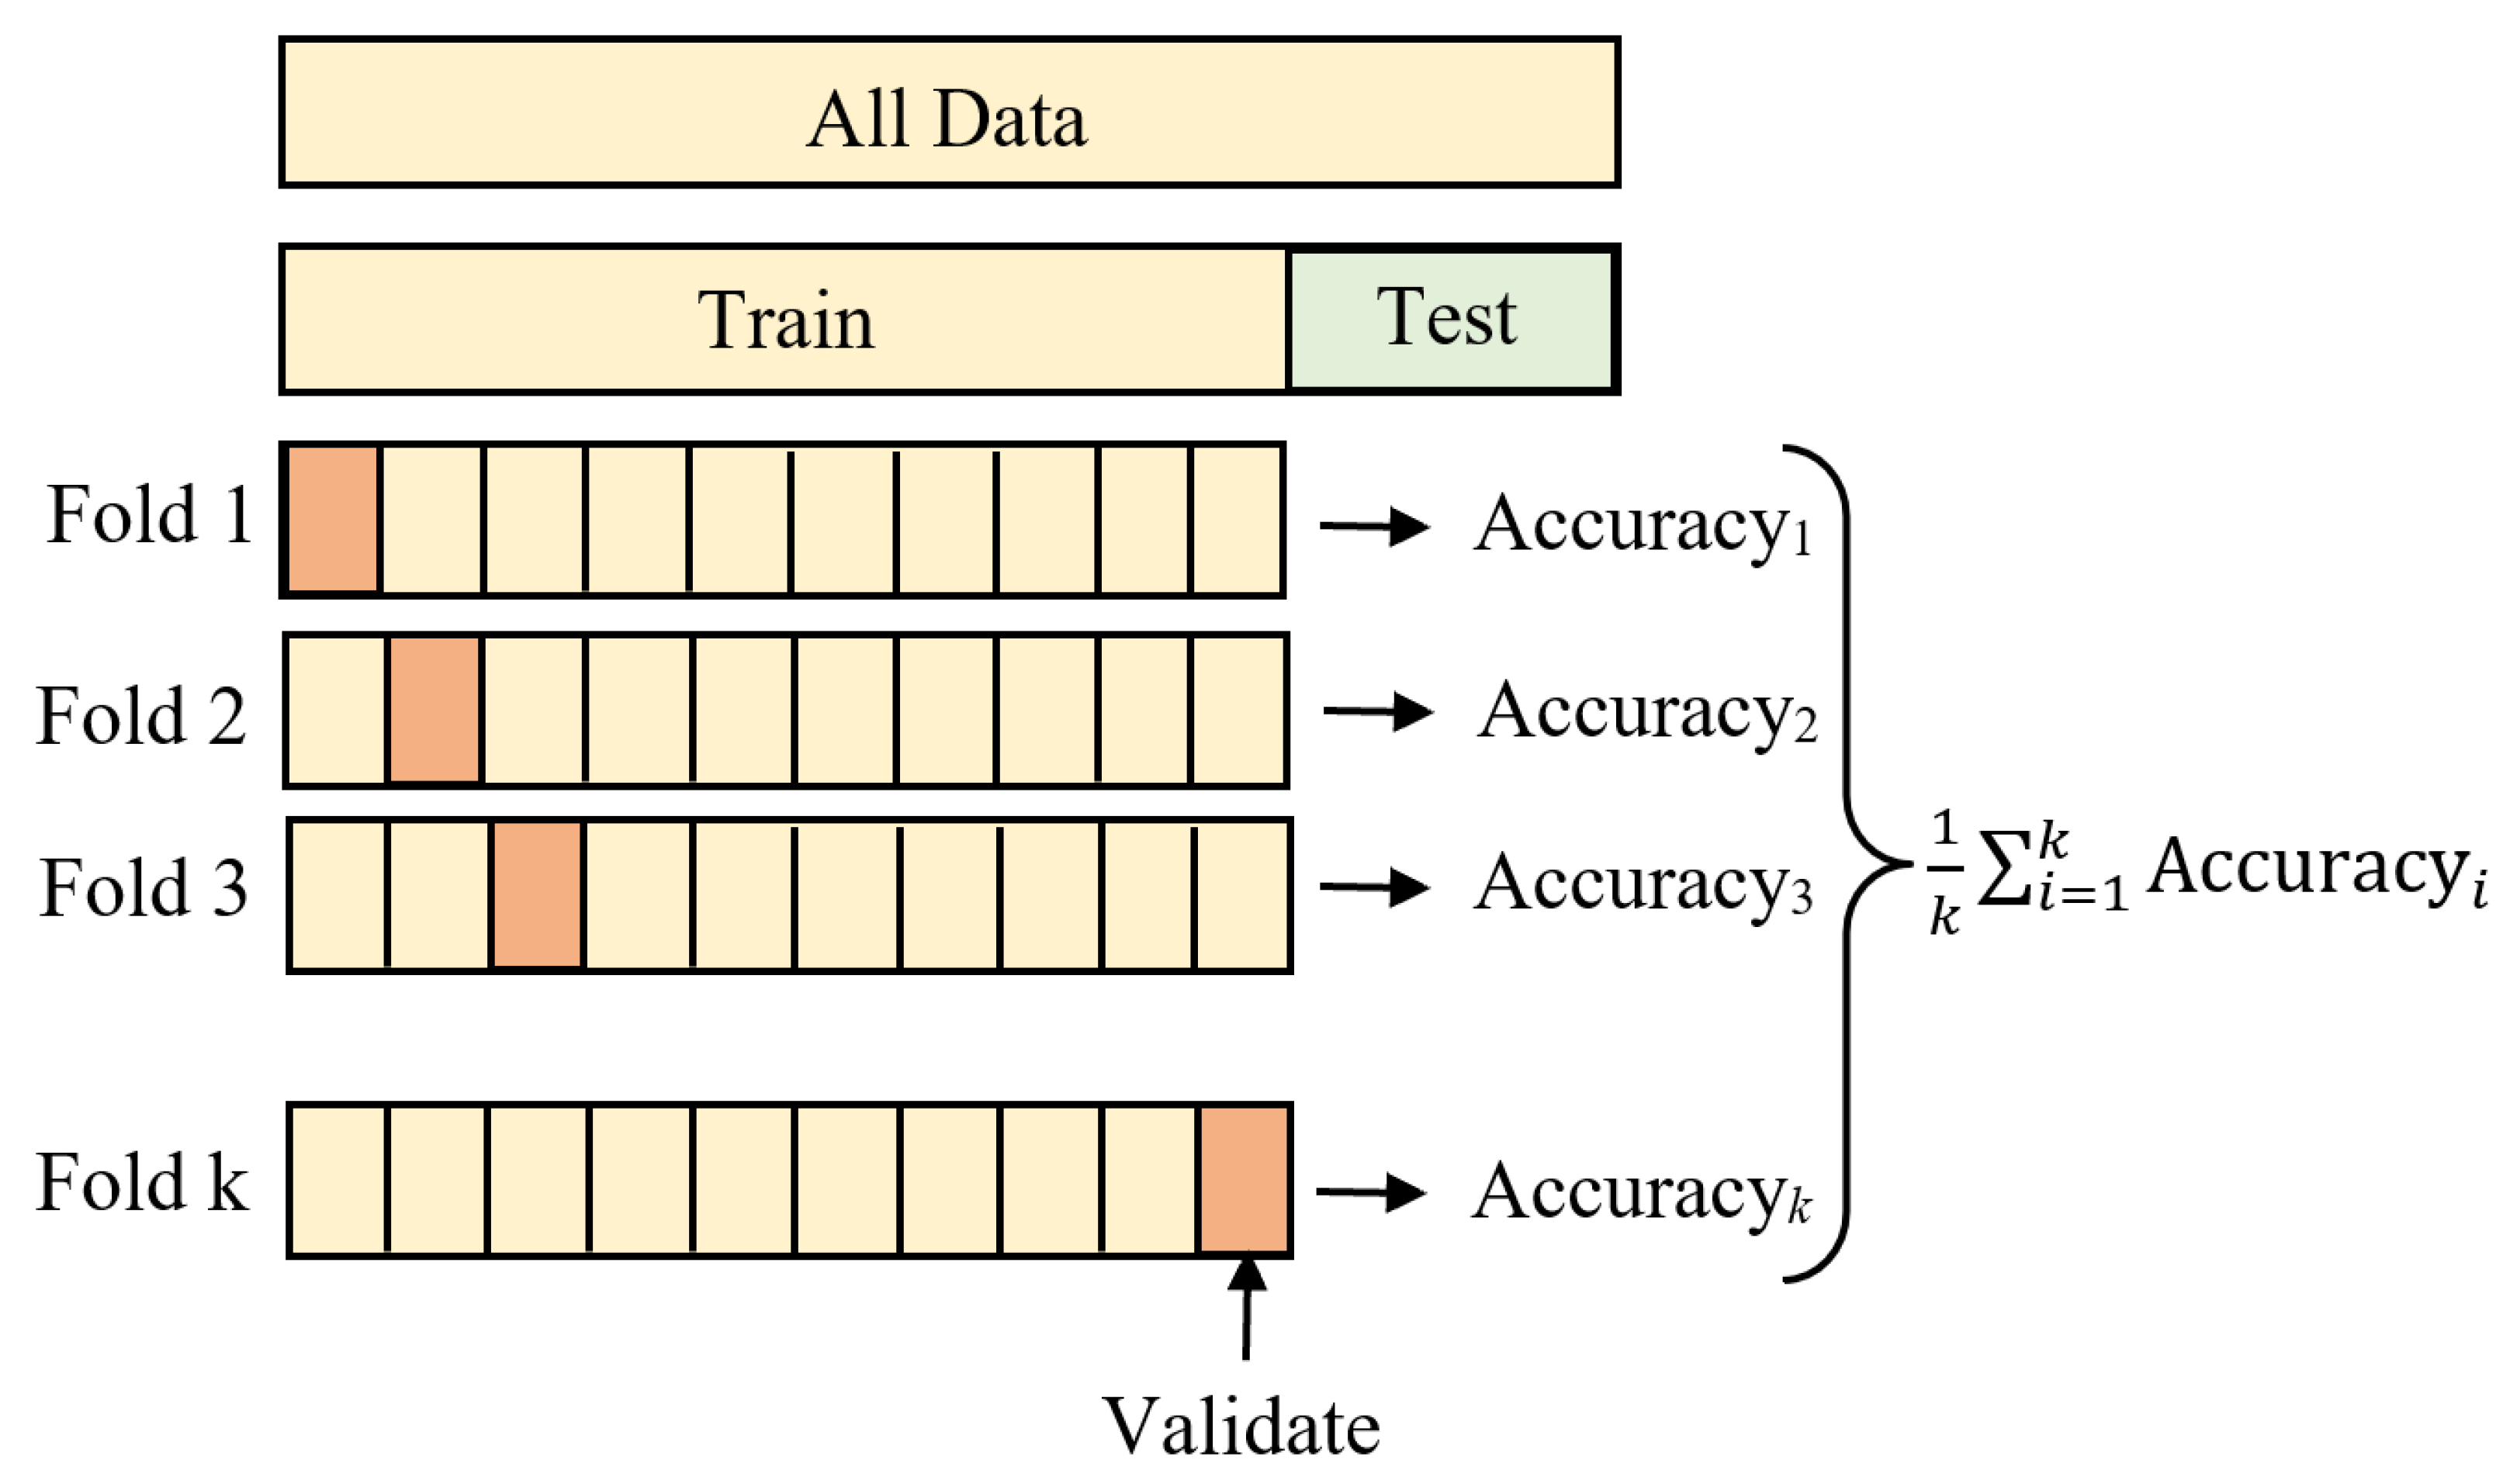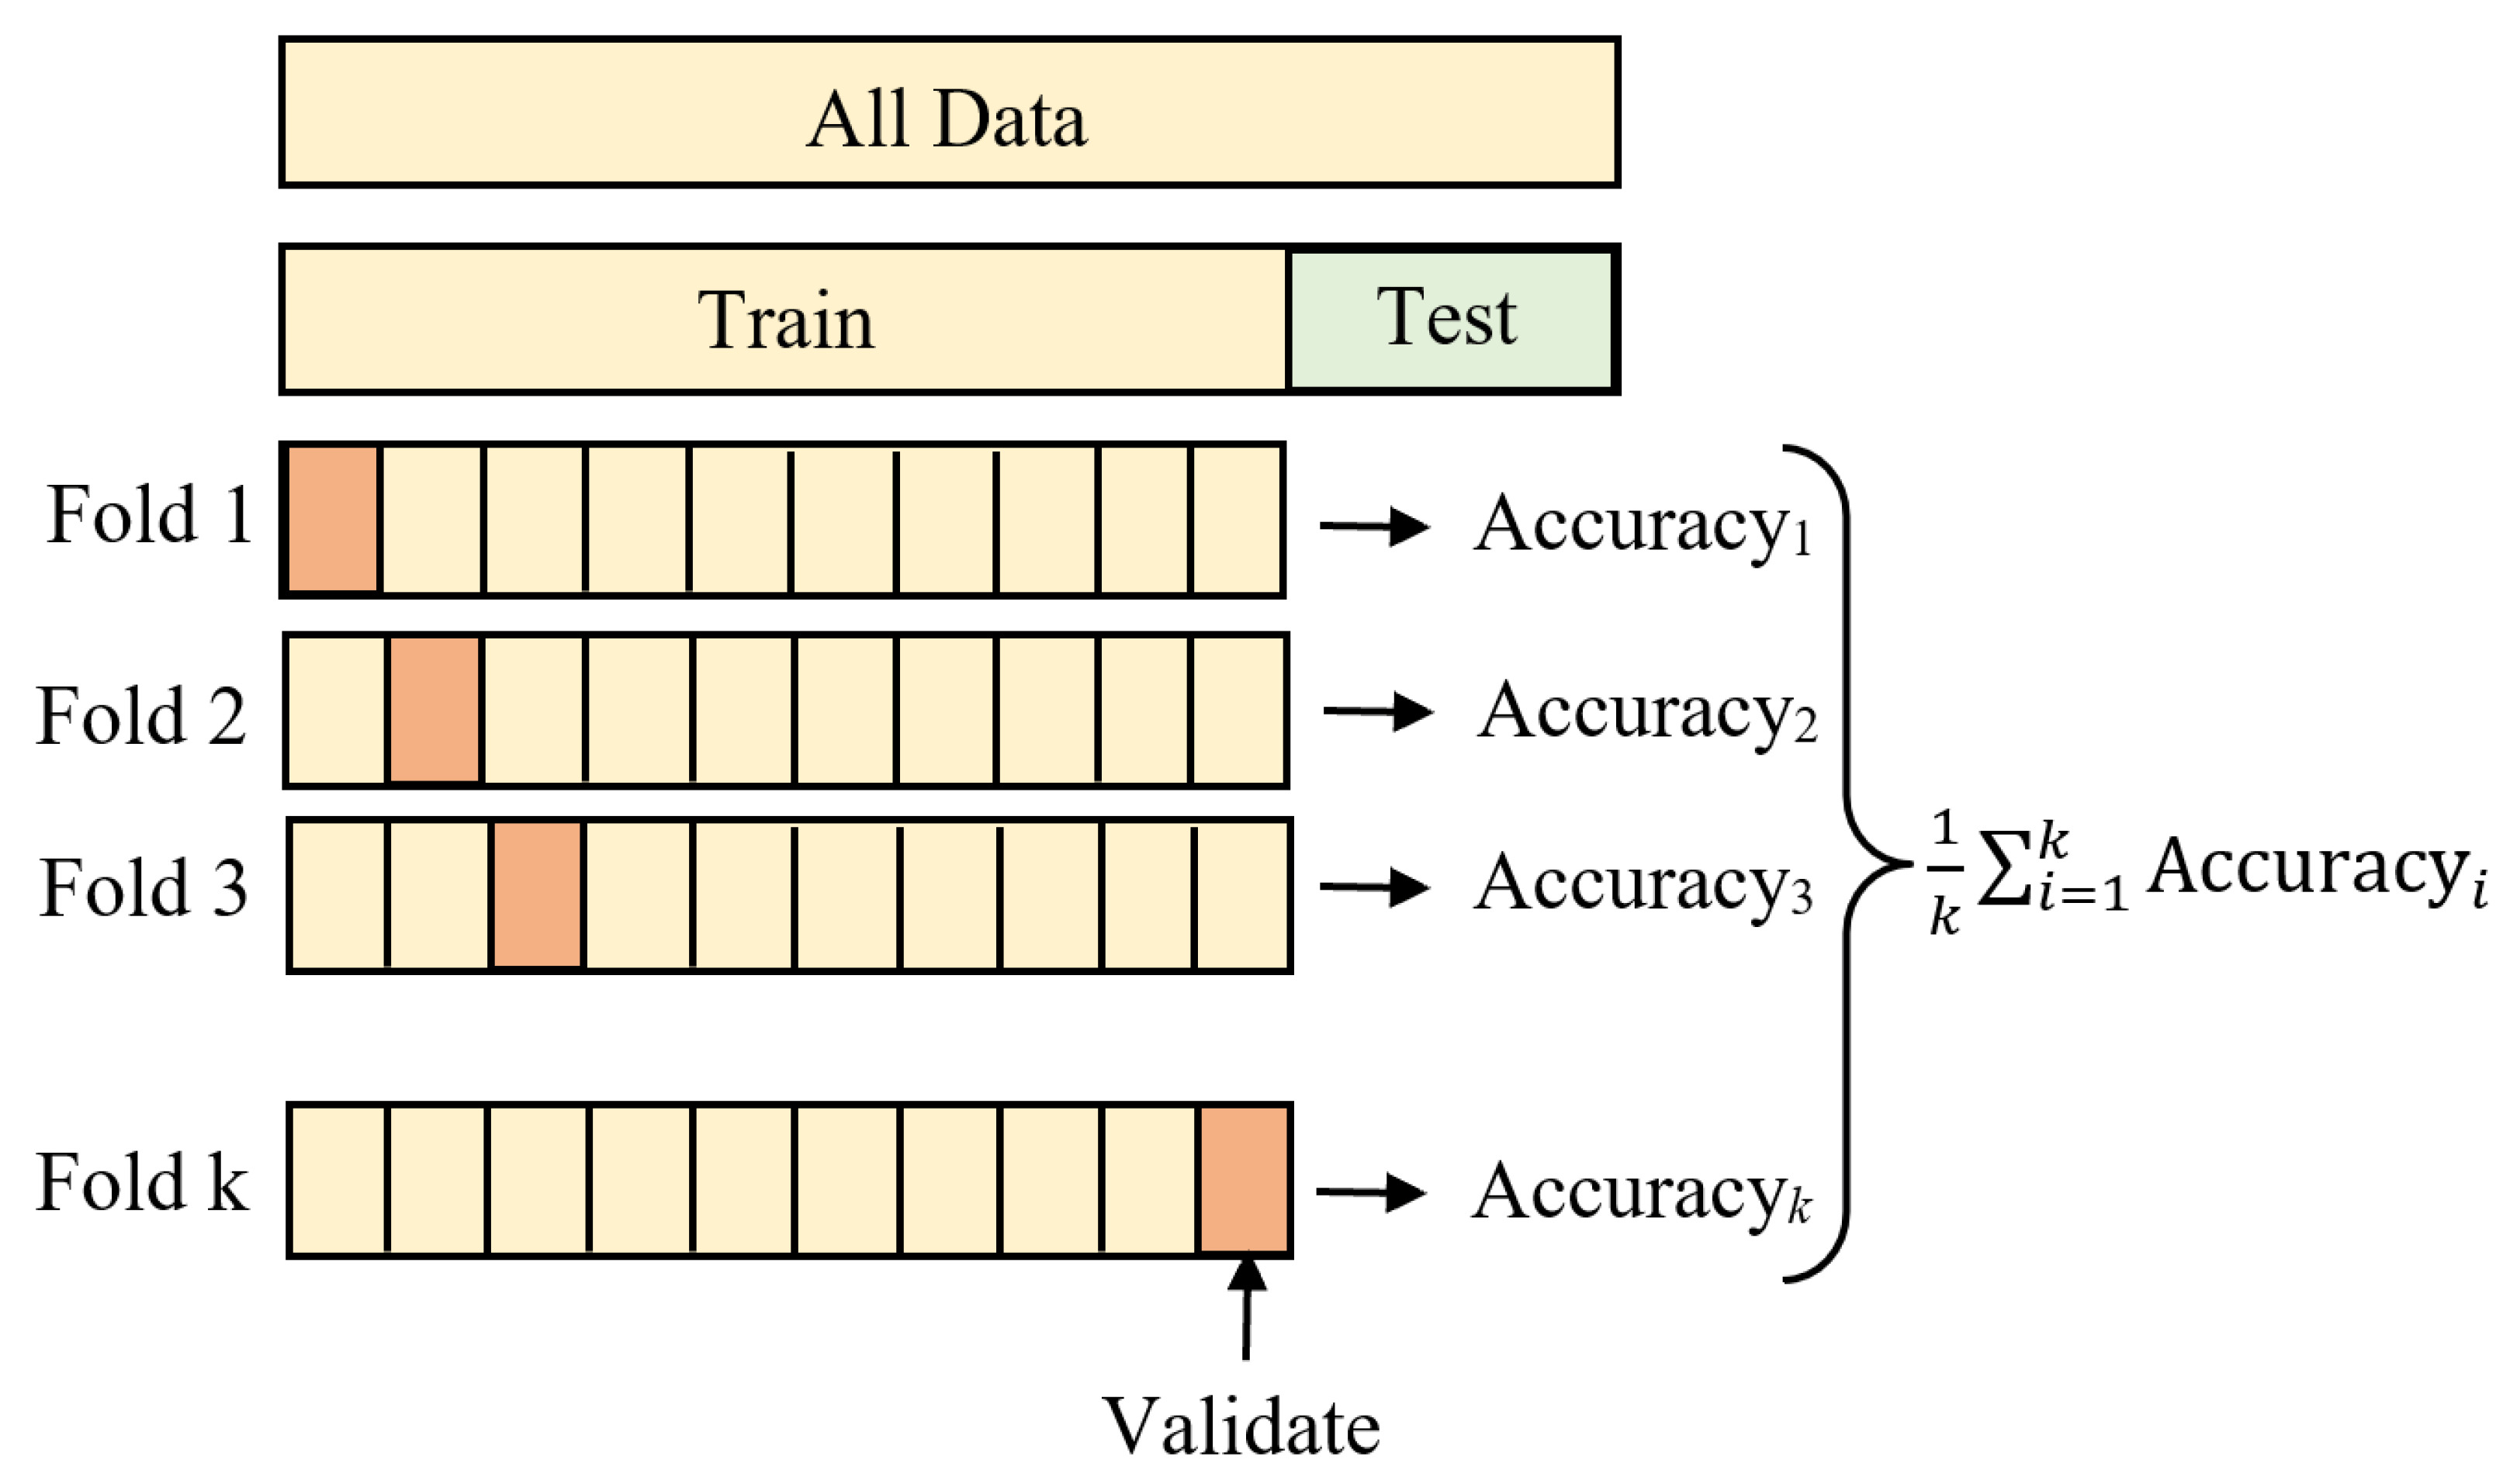))Fold Cross Validation**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

when we re-execute the model will change the accuracy score
thats why we go for cross fold validatation

<img src="/content//content/Cross_validation_img.jpg" alt="Cross validation" width="500" height="600">

**LogisticRegression**

In [4]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9592592592592593

**SVM**

In [5]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.31851851851851853

**Random Forest**

In [6]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9740740740740741

<h2 style='color:purple'>K_Fold cross validation</h2>


```
# Basic Example
```



In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [8]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


**Use k_fold for our digits example**

In [9]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [10]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [11]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [12]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [13]:
scores_rf

[0.9365609348914858, 0.9532554257095158, 0.9265442404006677]

**Cross_validation_score**

In [14]:
from sklearn.model_selection import cross_val_score

<\Logistic Regression model perfomance using ***cross_val_score***\>

In [15]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

**svm model performance using cross_val_score**

In [16]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

**random forest performance using cross_val_score**

In [17]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.92988314, 0.94156928, 0.91986644])

cross_val_score uses stratifield kfold by default

In [18]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8658845437616387

# **Parameter tunning using k fold cross validation**

In [19]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9332247051520793

In [20]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9443358162631906

In [21]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9448975791433891

Here we used cross_val_score to
fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result.

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

**Logistic Regression**

In [24]:
l_scores = cross_val_score(LogisticRegression(), iris.data, iris.target)
l_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [25]:
np.average(l_scores)

0.9733333333333334

**Decision Tree**

In [28]:
d_scores = cross_val_score(DecisionTreeClassifier(), iris.data, iris.target)
d_scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [29]:
np.average(d_scores)

0.9533333333333334

**Support Vector Machine (SVM)**

In [30]:
s_scores = cross_val_score(SVC(), iris.data, iris.target)
s_scores

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [31]:
np.average(s_scores)

0.9666666666666666

**Random Forest**

In [32]:
r_scores = cross_val_score(RandomForestClassifier(n_estimators=40), iris.data, iris.target)
r_scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [33]:
np.average(r_scores)

0.9666666666666668

#**Best score so far is from Logistic Regression: 0.9733333333333334**